In [9]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')

In [14]:
# x_train is the input variable (size in 100 square meter)
# y_train is the target (price in 1000s of turkish lira)
x_train = np.array([1.0, 2.0, 3.0, 5.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0])
y_train = np.array([500.0, 2000.0, 3000.0, 10000.0, 1500.0, 5000.0, 8000.0, 12000.0, 15000.0, 20000.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [ 1.  2.  3.  5.  2.  4.  6.  8. 10. 12.]
y_train = [  500.  2000.  3000. 10000.  1500.  5000.  8000. 12000. 15000. 20000.]


In [15]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (10,)
Number of training examples is: 10


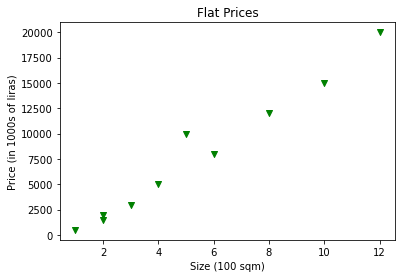

In [26]:
# Plot the data points
plt.scatter(x_train, y_train, marker='v', c='g')
# Set the title
plt.title("Flat Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of liras)')
# Set the x-axis label
plt.xlabel('Size (100 sqm)')
plt.show()

In [51]:
w = 1800
b = -2000
print(f"w: {w}")
print(f"b: {b}")

w: 1800
b: -2000


In [52]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

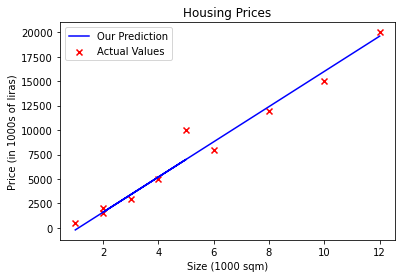

In [53]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of liras)')
# Set the x-axis label
plt.xlabel('Size (1000 sqm)')
plt.legend()
plt.show()

Let's guess the new house's price. It's 550 square meters!

In [66]:
x_i = 5.5
cost_550sqft = w * x_i + b    

print(f"{cost_550sqft:.0f}k ₺ is the estimate price for your house.")

7900k ₺ is the estimate price for your house.
